In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util.plot import plot_cdf
from util.consts import balance_size_bins, balance_size_bins_label
from util.plot import color_list

Predicted Completion Times: (40000,)


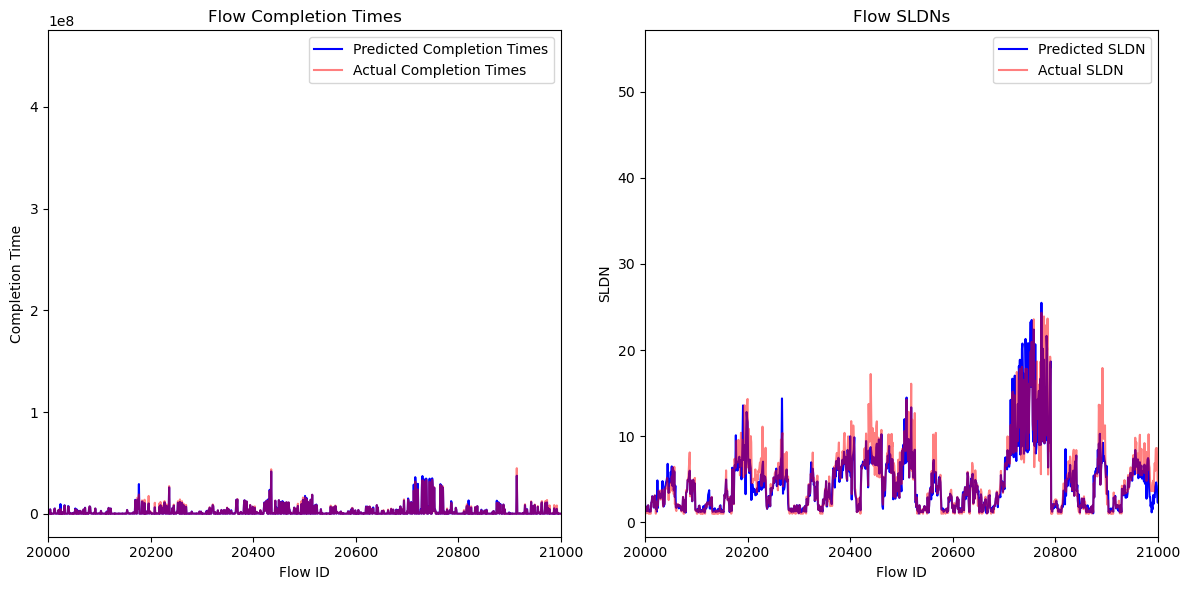

In [2]:
# Load the data from the .npz file
max_inflight_flows=0
scenario_idx=0
# model_instance = "link_batch"
model_instance = "link_cplusplus"
# model_instance = "flowsim"
empirical_str = "_empirical"
# empirical_str=''
    
data = np.load(f'./res/inference_{model_instance}{empirical_str}.npz')
fct = data['fct']
sldn = data['sldn']

# Extract the data
predicted_completion_times = fct[scenario_idx, :, 0].flatten()
actual_completion_times = fct[scenario_idx, :, 1].flatten()
predicted_sldns = sldn[scenario_idx, :, 0].flatten()
predicted_sldns[predicted_sldns<1]=1
actual_sldns = sldn[scenario_idx, :, 1].flatten()
print('Predicted Completion Times:', predicted_completion_times.shape)
# Plotting the completion times
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(predicted_completion_times, label='Predicted Completion Times', color='b')
plt.plot(actual_completion_times, label='Actual Completion Times', color='r',alpha=0.5)
plt.xlabel('Flow ID')
plt.ylabel('Completion Time')
plt.title('Flow Completion Times')
plt.legend()
plt.xlim(20000, 21000)

# Plotting the SLDNs
plt.subplot(1, 2, 2)
plt.plot(predicted_sldns, label='Predicted SLDN', color='b')
plt.plot(actual_sldns, label='Actual SLDN', color='r',alpha=0.5)
plt.xlabel('Flow ID')
plt.ylabel('SLDN')
plt.title('Flow SLDNs')
plt.legend()
# plt.ylim(0, 6)
plt.xlim(20000, 21000)
# Show the plots
plt.tight_layout()
plt.show()

Predicted Completion Times: (40000,)


(0.0, 30.0)

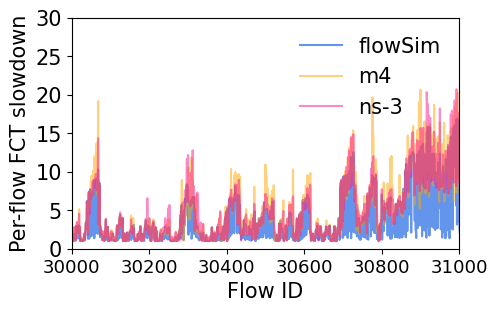

In [8]:
# Load the data from the .npz file
max_inflight_flows=0
scenario_idx=0
# model_instance = "link_batch"
model_instance = "link_cplusplus"
# model_instance = "flowsim"
empirical_str = "_empirical"
# empirical_str=''
_fontsize=15

data = np.load(f'./res/inference_link{empirical_str}.npz')
fct = data['fct']
sldn = data['sldn']
# Extract the data
predicted_completion_times = fct[scenario_idx, :, 0].flatten()
actual_completion_times = fct[scenario_idx, :, 1].flatten()
predicted_sldns = sldn[scenario_idx, :, 0].flatten()
predicted_sldns[predicted_sldns<1]=1
actual_sldns = sldn[scenario_idx, :, 1].flatten()
print('Predicted Completion Times:', predicted_completion_times.shape)

data = np.load(f'./res/inference_flowsim{empirical_str}.npz')
fct = data['fct']
sldn = data['sldn']
# Extract the data
predicted_completion_times_flowsim = fct[scenario_idx, :, 0].flatten()
predicted_sldns_flowsim = sldn[scenario_idx, :, 0].flatten()
predicted_sldns_flowsim[predicted_sldns_flowsim<1]=1

# Plotting the completion times
plt.figure(figsize=(5, 3))
plt.plot(predicted_sldns_flowsim, label='flowSim', color=color_list[0])
plt.plot(actual_sldns, label='m4', color=color_list[1],alpha=0.5)
plt.plot(predicted_sldns, label='ns-3', color=color_list[2],alpha=0.5)
plt.xlabel('Flow ID',fontsize=_fontsize)
plt.ylabel('Per-flow FCT slowdown',fontsize=_fontsize)
plt.xticks(fontsize=_fontsize-2)
plt.yticks(fontsize=_fontsize)
plt.legend(frameon=False,fontsize=_fontsize,loc='upper right')
plt.xlim(30000, 31000)
plt.ylim(0, 30)

# # Plotting the SLDNs
# plt.subplot(1, 2, 2)
# plt.plot(predicted_sldns, label='Predicted SLDN', color='b')
# plt.plot(actual_sldns, label='Actual SLDN', color='r',alpha=0.5)
# plt.xlabel('Flow ID')
# plt.ylabel('SLDN')
# plt.title('Flow SLDNs')
# plt.legend()
# # plt.ylim(0, 6)
# plt.xlim(20000, 21000)
# # Show the plots
# plt.tight_layout()
# plt.show()

fct: (82, 40000, 2), sldn: (82, 40000, 2)
Predicted Completion Times: (3280000,)
max sldn = 70.46686330495996, 69.51546478271484
mean error=16.2938576338757, 3.392343953565168
p99 error


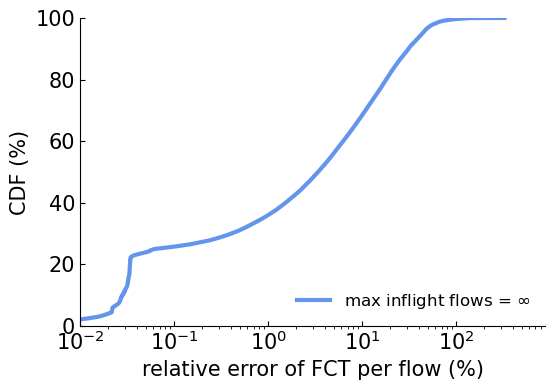

In [12]:
res_error_time=[]
res_error_sldn=[]
max_inflight_flows_list=[0]
flow_size_threshold='inf'
legend_list=[f'max inflight flows = {max_inflight_flows}' if max_inflight_flows!=0 else f'max inflight flows = $\infty$' for max_inflight_flows in max_inflight_flows_list]
for max_inflight_flows in max_inflight_flows_list:
    data = np.load(f'./res/inference_{model_instance}{empirical_str}.npz')
    fct = data['fct']
    sldn = data['sldn']
    print(f"fct: {fct.shape}, sldn: {sldn.shape}")
    
    # Extract the data
    predicted_completion_times = fct[:, :, 0].flatten()
    actual_completion_times = fct[:, :, 1].flatten()
    predicted_sldns = sldn[:, :, 0].flatten()
    actual_sldns = sldn[:, :, 1].flatten()
    print('Predicted Completion Times:', predicted_completion_times.shape)
    # calculate the relative error
    relative_error_time = np.abs(actual_completion_times - predicted_completion_times) / actual_completion_times *100
    relative_error_sldn = np.abs(actual_sldns - predicted_sldns) / actual_sldns *100
    res_error_time.append(relative_error_time)
    res_error_sldn.append(relative_error_sldn)
    print(f"max sldn = {np.max(actual_sldns)}, {np.max(predicted_sldns)}")
    print(f"mean error={np.mean(relative_error_time)}, {np.median(relative_error_sldn)}")
    print(f"p99 error")

fig_index=0
plot_cdf(
    res_error_sldn,
    None,
    legend_list,
    x_label="relative error of FCT per flow (%)",
    log_switch=True,
    rotate_xaxis=False,
    # ylim_low=90,
    # xlim=1,
    xlim_bottom=0.01,
    fontsize=15,
    legend_font=12,
    loc=4,
    enable_abs=True,
    group_size=5,
    fig_idx=fig_index
)
fig_index=1



sldn: (100, 40000, 2)
sldn: (1, 40000, 2)
sldn: (1, 40000, 2)
sldn: (1, 40000, 2)
error_list:[27.818977996630974, 18.52023039578729, 20.104574, 20.376577]
error_list:[15.53604595989195, 12.309566100652518, 13.536545, 13.537622]


AttributeError: 'list' object has no attribute 'shape'

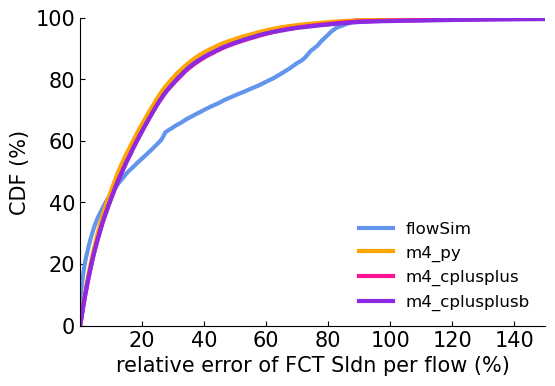

In [4]:
size_list=[]
error_list=[]
legend_list=['flowSim', 'm4_py','m4_cplusplus','m4_cplusplusb']
model_instance_list=['flowsim', 'link_py', 'link_cplusplus', 'link_cplusplusb']
# legend_list=['flowSim', 'm4_py']
# model_instance_list=['flowsim', 'link_py']
fig_index=0
for model_instance in model_instance_list:
    data_m4 = np.load(f'./res/inference_{model_instance}{empirical_str}.npz')
    sldn = data_m4['sldn']
    print(f"sldn: {sldn.shape}")
    predicted_sldns = sldn[0, :, 0]
    actual_sldns=sldn[0, :, 1]
    # actual_sldns = sldn[:, :, 1]
    
    # calculate the relative error
    relative_error_sldn = np.abs(actual_sldns - predicted_sldns) / actual_sldns *100
    error_list.append(relative_error_sldn)
# error_list=np.array(error_list)
# size_list=np.array(size_list).squeeze()
# print(f"error_list: {error_list.shape}")
print(f"error_list:{[np.mean(x) for x in error_list]}")
print(f"error_list:{[np.median(x) for x in error_list]}")
plot_cdf(
    error_list,
    None,
    legend_list,
    x_label="relative error of FCT Sldn per flow (%)",
    log_switch=False,
    rotate_xaxis=False,
    # ylim_low=90,
    xlim=150,
    xlim_bottom=0.01,
    fontsize=15,
    legend_font=12,
    loc=4,
    enable_abs=True,
    group_size=5,
    fig_idx=fig_index
)
fig_index=1

print(f"size_list: {size_list.shape}")
fsize_total_per_flow=np.digitize(size_list.flatten(), balance_size_bins)
print(f"fsize_total_per_flow: {fsize_total_per_flow.shape}")
error_list=np.reshape(error_list, [error_list.shape[0], -1])
x=[]
for k in range(len(balance_size_bins_label)):
    target_idx=fsize_total_per_flow==k
    tmp=error_list[:, target_idx]  
    x.append([np.mean(tmp, axis=1), np.max(tmp, axis=1)])
    x=np.array(x)
    print(f"x: {x.shape}")

plot_res=x[:,0,:].squeeze().T
print(f"plot_res: {plot_res.shape}")
plt.figure(fig_index,figsize=(5, 3))
plt.title(f"per-flow mean error on {dataset_str[1:]} set", fontsize="x-large")
for i in range(len(plot_res)):
    plt.plot(plot_res[i], label=legend_list[i])
    plt.xticks(ticks=np.arange(len(balance_size_bins_label)), labels=balance_size_bins_label,rotation=30)
    plt.legend(loc="lower left")

plt.xlabel("Flow size")
plt.ylabel(f"relative error of per-flow sldn (%)")
plt.axvline(x=6, color='r', linestyle='--')
plt.axvline(x=7, color='b', linestyle='--')
# plt.axhline(y=50, color='k', linestyle='--')
# plt.text(0, 50, '50%', color='k')
plt.axhline(y=10, color='k', linestyle='--')
plt.text(0, 10, '10%', color='k')
plt.yscale('log')
fig_index+=1

plot_res=x[:,1,:].squeeze().T
print(f"plot_res: {plot_res.shape}")
plt.figure(fig_index,figsize=(5, 3))
plt.title(f"per-flow p99 error on {dataset_str[1:]} set", fontsize="x-large")
for i in range(len(plot_res)):
    plt.plot(plot_res[i], label=legend_list[i])
    plt.xticks(ticks=np.arange(len(balance_size_bins_label)), labels=balance_size_bins_label,rotation=30)
    plt.legend()

plt.xlabel("Flow size")
plt.ylabel(f"relative error of per-flow sldn (%)")
plt.axvline(x=6, color='r', linestyle='--')
plt.axvline(x=7, color='b', linestyle='--')
plt.axhline(y=50, color='k', linestyle='--')
plt.text(0, 50, '50%', color='k')
plt.axhline(y=10, color='k', linestyle='--')
plt.text(0, 10, '10%', color='k')
plt.yscale('log')
fig_index+=1

common_scenarios: {1, 3, 67, 69, 75, 84, 55, 24, 88, 62}
[10, 10, 10]
[0.08761208057403565, 84.31884124279023, 83.89564723968506]


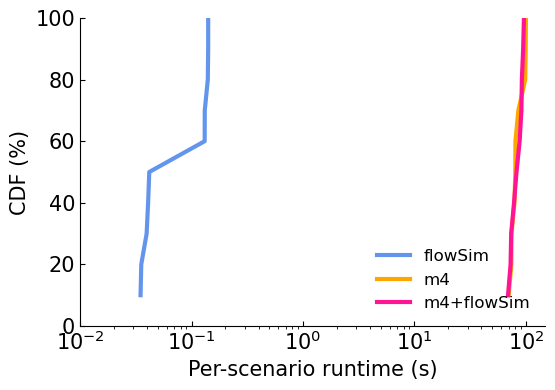

In [6]:
import re

def read_log_file(file_path):
    try:
        with open(file_path, 'r') as file:
            log_text = file.read()
        return log_text
    except FileNotFoundError:
        print(f"Error: The file {file_path} was not found.")
        return None

def extract_scenario_times(log_text, idx=0):
    # Regex patterns for time elapsed and workload scenario
    time_pattern = r"Time elapsed:\s([\d.]+)"
    workload_pattern = r"Finished workload=(\d+)"

    # Extract times and workload IDs
    elapsed_times = re.findall(time_pattern, log_text)
    workload_ids = re.findall(workload_pattern, log_text)

    # Create a dictionary mapping scenario ID to time elapsed
    scenario_times = {}
    for workload, time in zip(workload_ids, elapsed_times):
        time=float(time)
        if idx==0 or time>1:
            scenario_times[int(workload)] = float(time)
    
    return scenario_times
    
filenmae_list=['flowsim.log', 'link.log', 'link_flowsim.log']
res=[]

for file_idx,log_file_path in enumerate(filenmae_list):
    log_text = read_log_file(log_file_path)
    # Extract time elapsed values
    # print(f"{log_text}")
    elapsed_times = extract_scenario_times(log_text,file_idx)
    res.append(elapsed_times)
# print([np.mean(x) for x in res])

# Find common scenarios between all files
common_scenarios = set(res[0].keys())
for scenario_times in res[1:]:
    common_scenarios.intersection_update(scenario_times.keys())
print(f"common_scenarios: {common_scenarios}")
filtered_res = []
for scenario_times in res:
    filtered_scenario_times = np.array([v for k, v in scenario_times.items() if k in common_scenarios])
    filtered_res.append(filtered_scenario_times)
print([len(x) for x in filtered_res])
print([np.mean(x) for x in filtered_res])
plot_cdf(
    filtered_res,
    None,
    legend_list,
    x_label="Per-scenario runtime (s)",
    log_switch=True,
    rotate_xaxis=False,
    # ylim_low=90,
    # xlim=150,
    xlim_bottom=0.01,
    fontsize=15,
    legend_font=12,
    loc=4,
    enable_abs=True,
    group_size=5,
    fig_idx=fig_index
)
fig_index=1